# a) Length of Narratives

In [26]:
import pandas as pd
import numpy as ny

In [195]:
d=pd.read_csv("/Users/apple/Documents/GitHub/Zhenwei_Ma/hw05/emergency.csv",header=None)
d.columns=['narratives']

In [177]:
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   narratives  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


,narratives
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...


In [76]:
d['length']=d["narratives"].str.len()

In [87]:
d['length'].max()

143

## I tried to select the longest data for observation, and found that their length was 143. Therefore, the longest data is not only one, but many are juxtaposed.

In [92]:
long = d.sort_values(by =['length'], ascending=False).head()
print(short)

                                             narratives  length
5811  DX SYNCOPE/PROLONGED QT/CHEST PN: 49YOF COMPET...     143
511   19MOWF  PARENTS HOLDING PT.  DAD STATES SHE WA...     143
4322  AT  HOUSE- FELL ONTO BACK OF HIS HEAD, WHILE  ...     143
6493  21MOF IN LIVING ROOM,FOUND W/BURN THUMB,OTTOMA...     143
4791  79 YO F, C/O RT SHOULDER, FACIAL PAIN, WAS WAL...     143
920   57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...     143
1752  43YOM WAS USING A CIRCULAR SAW LAST PM CUTTING...     143
3795  61 YOM, WOKE UP, DIZZY,HAND FELL THRU WINDOW, ...     143
8570  16YOM  PT'S L SHOULDER POPPED OUT FOR A MOMENT...     143
5856  17YOM WITH FINGER FX LAST WEEK, HAD SPLINT PLA...     143
9666  22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...     143
8589  26 YO F, C/O TENDER GROWTH ON HEAD,HAS HAD IT ...     143
3613  37YOM  PT STATES HE HAD A NAIL STUCK IN HIS L ...     143
9670  45YOWM  TONIGHT PT WAS TRYING TO MOVE HIS FATH...     143
7707  17 YO F SLIPPED AT POOL WHEN FEET 

In [91]:
longest=d[d["narratives"].str.len()==d['length'].max()]
print(longest)

                                             narratives  length
109   40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FE...     143
511   19MOWF  PARENTS HOLDING PT.  DAD STATES SHE WA...     143
630   44YOF  PT HAVING SEVERE R ARM PAIN THAT IS RAD...     143
920   57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...     143
1111  13YOM DID OUTDOOR WORKOUT X1 1/2 HRS, DEVELOEP...     143
...                                                 ...     ...
9370  20 YO M, RUNNING FROM POLICE AFTER AN ALLEGED ...     143
9666  22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...     143
9670  45YOWM  TONIGHT PT WAS TRYING TO MOVE HIS FATH...     143
9749  PT.INJ.NOSE,HAND,WRIST,ELBOW WHEN RIDING BIKE ...     143
9853  15YF ON BUS TO SOCCER GAME&NOTICED "FUNNY SMEL...     143

[66 rows x 2 columns]


In [93]:
shortest=d[d["narratives"].str.len()==d['length'].min()]
print(shortest)

             narratives  length
7127  ABR HIP ON FLOOR       17
7731  INGESTION OF ***       17


# b) Fractures

In [95]:
import re

In [104]:
d['fractures'] = d['narratives'].str.extract(r'(FRACT*|FX)')

In [105]:
d.head()

,narratives,length,fractures
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,53,FRACT
1,75YOF WITH LAC TO FINGER FROM METAL CAN,40,NaN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,40,FRACT
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,57,NaN
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...,52,NaN


In [106]:
d['fractures'].value_counts()

FX       969
FRACT    538
FRAC      17
Name: fractures, dtype: int64

In [107]:
len(d[d['fractures'].isna() != 1])

1524

## there are 1524 narratives related to "Fracutres".

# c) Body Parts

In [110]:
d2=d[d['fractures'].isna() != 1]
d2.head()

,narratives,length,fractures
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,53,FRACT
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,40,FRACT
6,12YOF FELL DOWN STAIRS DX: FX RADIUS,36,FX
10,77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSI...,71,FX
19,34YOM-FELL DOWN INDOOR STEPS @ HOME CARRYING A...,117,FX


In [119]:
d3= d2['narratives'].str.extract(r'(LEG|HIP|FINGER|HAND|ANKLE|RADIUS|SHOULDER|ELBOW|FOOT|TOE|NOSE|RIB)')
d3=d3.dropna()

In [127]:
print(d3)
d3.info()

           0
2     FINGER
6     RADIUS
10     ANKLE
31    FINGER
35    FINGER
...      ...
9936    FOOT
9939    HAND
9945  RADIUS
9980   ELBOW
9984  RADIUS

[1016 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 2 to 9984
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1016 non-null   object
dtypes: object(1)
memory usage: 15.9+ KB


In [140]:
d4=d3.value_counts()
d4

HAND        133
FOOT        131
FINGER      125
ANKLE       117
HIP          82
RIB          81
RADIUS       78
ELBOW        74
TOE          63
SHOULDER     60
LEG          59
NOSE         13
dtype: int64

Text(0, 0.5, 'Occurance')

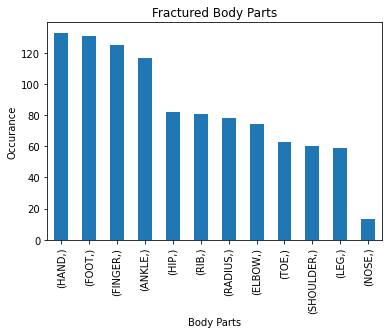

In [141]:
from matplotlib import pyplot as pl

d4.plot.bar()
pl.title ("Fractured Body Parts")
pl.xlabel ("Body Parts")
pl.ylabel ("Occurance")

# d) Age and Gender

In [200]:
d5 = pd.read_csv('/Users/apple/Documents/GitHub/Zhenwei_Ma/hw05/emergency.csv', header=None)

In [201]:
age_gender_list = [i for i in d5[0] if re.search(r'\d{1,3}\s*(YR|YO|MO)\s*(F|M)\w*\b',i)]
len(age_gender_list)

7343

In [202]:
age_gender = pd.DataFrame(age_gender_list,columns=['text'])
age_gender.head(5)

,text
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
4,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...


In [203]:
age_gender['age'] = [match.group(1) for match in [re.search(r'(\d{1,3})\s*(YR|YO|MO)\s*(F|M)\w*\b',i) for i in age_gender['text']] if match]
age_gender['gender'] = [match.group(3) for match in [re.search(r'(\d{1,3})\s*(YR|YO|MO)\s*(F|M)\w*\b',i) for i in age_gender['text']] if match]
age_gender['age_unit']= [match.group(2) for match in [re.search(r'(\d{1,3})\s*(YR|YO|MO)\s*(F|M)\w*\b',i) for i in age_gender['text']] if match]

In [204]:
age_gender['age'] = age_gender['age'].astype(str).astype(int)
age_gender.loc[age_gender['age_unit'] == 'MO', 'age'] = age_gender['age']/12
age_gender = age_gender.drop(columns=['age_unit'])
age_gender.head(5)

,text,age,gender
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,0.833333,F
1,75YOF WITH LAC TO FINGER FROM METAL CAN,75.000000,F
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,8.000000,F
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,9.000000,M
4,DX NASAL INJ: 9YOM C/O FELL OFF SWING @ SCHOOL...,9.000000,M


In [205]:
age_gender['gender'].value_counts()

M    4145
F    3198
Name: gender, dtype: int64

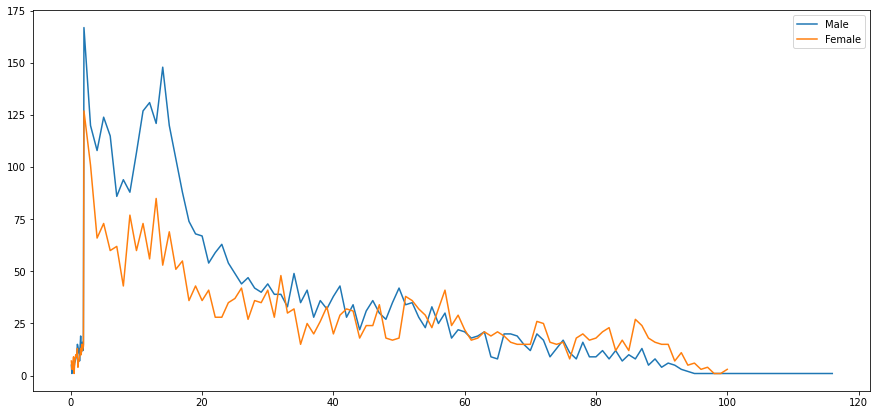

In [206]:
count = age_gender.groupby('age').count()
age_gender['count'] = age_gender.groupby('age')['age'].transform('count')
fig, ax = plt.subplots(figsize = (15,7))
age_gender[age_gender_df['gender'] == 'M']['age'].value_counts().sort_index().plot.line(label = 'Male')
age_gender[age_gender_df['gender'] == 'F']['age'].value_counts().sort_index().plot.line(label = 'Female')
leg = ax.legend()